# AI-Enhanced Surrogate Model for NPZ-D Ecosystem

This notebook evaluates a Random Forest surrogate model for the enhanced NPZ-D model, using synthetic training data from `real_forced_training_data.csv` and predictions from `rf_predictions.csv`.

In [6]:
import pandas as pd

# Load the training data
df = pd.read_csv('real_forced_training_data.csv')

# Print summary statistics
print("Summary Statistics for Training Data:")
print(df[['sst', 'N_0', 'N', 'P', 'Z', 'D', 'chlorophyll']].describe())

# Check for negative values
print("\nChecking for Negative Values:")
for col in ['N', 'P', 'Z', 'D', 'chlorophyll']:
    negatives = (df[col] < 0).sum()
    print(f"{col}: {negatives} negative values")

# Check for extreme values
print("\nChecking for Extreme Values (>1000):")
for col in ['N', 'P', 'Z', 'D', 'chlorophyll']:
    extremes = (df[col] > 1000).sum()
    print(f"{col}: {extremes} values > 1000")

Summary Statistics for Training Data:
               sst          N_0            N            P            Z  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     14.780501    14.828992     9.108556     3.347046     0.495487   
std       5.299617     2.858830     5.737404     3.099363     0.438147   
min       5.697059    10.002634     0.116496     0.000000     0.047874   
25%      10.173770    12.314734     3.979673     1.123705     0.230226   
50%      14.620179    14.851621     9.900213     2.289622     0.361098   
75%      19.231053    17.208655    13.690473     5.066466     0.553433   
max      24.044513    19.993463    19.820214    17.301653     3.360071   

                 D  chlorophyll  
count  5000.000000  5000.000000  
mean      2.799607     1.071055  
std       2.226274     0.991796  
min       0.078245     0.000000  
25%       1.317466     0.359586  
50%       1.902176     0.732679  
75%       3.725129     1.621269  
max      13.804089     

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

# Create figures directory
import os
os.makedirs('figures', exist_ok=True)

## 1. Load Training Data
Load `real_forced_training_data.csv` and show basic statistics.

Training Data Statistics:
               sst          N_0            N            P            Z  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     14.780501    14.828992     9.108556     3.347046     0.495487   
std       5.299617     2.858830     5.737404     3.099363     0.438147   
min       5.697059    10.002634     0.116496     0.000000     0.047874   
25%      10.173770    12.314734     3.979673     1.123705     0.230226   
50%      14.620179    14.851621     9.900213     2.289622     0.361098   
75%      19.231053    17.208655    13.690473     5.066466     0.553433   
max      24.044513    19.993463    19.820214    17.301653     3.360071   

                 D  chlorophyll  
count  5000.000000  5000.000000  
mean      2.799607     1.071055  
std       2.226274     0.991796  
min       0.078245     0.000000  
25%       1.317466     0.359586  
50%       1.902176     0.732679  
75%       3.725129     1.621269  
max      13.804089     5.536529  


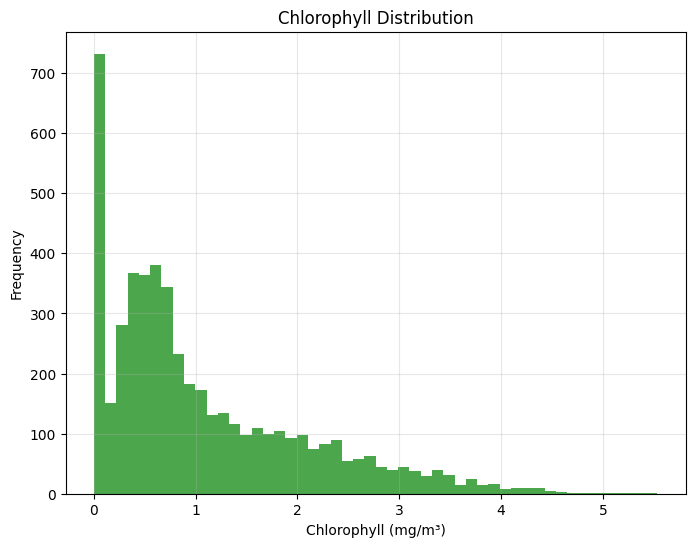

In [8]:
# Load training data
try:
    training_data = pd.read_csv('real_forced_training_data.csv')
    print('Training Data Statistics:')
    print(training_data[['sst', 'N_0', 'N', 'P', 'Z', 'D', 'chlorophyll']].describe())
except FileNotFoundError:
    print('Error: real_forced_training_data.csv not found. Ensure it is in the same directory as this notebook.')

# Plot chlorophyll distribution
plt.figure(figsize=(8, 6))
plt.hist(training_data['chlorophyll'], bins=50, color='green', alpha=0.7)
plt.title('Chlorophyll Distribution')
plt.xlabel('Chlorophyll (mg/m³)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('figures/chlorophyll_distribution.png', dpi=150)
plt.show()

## 2. Evaluate Predictions
Load `rf_predictions.csv` and calculate R² and RMSE for each output.

In [9]:
# Load predictions
try:
    predictions = pd.read_csv('rf_predictions.csv')
    outputs = ['N', 'P', 'Z', 'D', 'chlorophyll']
    metrics = {}
    for output in outputs:
        r2 = r2_score(predictions[f'{output}_true'], predictions[f'{output}_pred'])
        rmse = np.sqrt(mean_squared_error(predictions[f'{output}_true'], predictions[f'{output}_pred']))
        metrics[output] = {'R²': r2, 'RMSE': rmse}
        print(f'{output} - R²: {r2:.3f}, RMSE: {rmse:.3f}')
except FileNotFoundError:
    print('Error: rf_predictions.csv not found. Ensure it is in the same directory as this notebook.')

N - R²: 0.891, RMSE: 1.867
P - R²: 0.748, RMSE: 1.567
Z - R²: 0.751, RMSE: 0.220
D - R²: 0.895, RMSE: 0.735
chlorophyll - R²: 0.748, RMSE: 0.501


## 3. Visualize Predictions
Plot true vs. predicted values for each output.

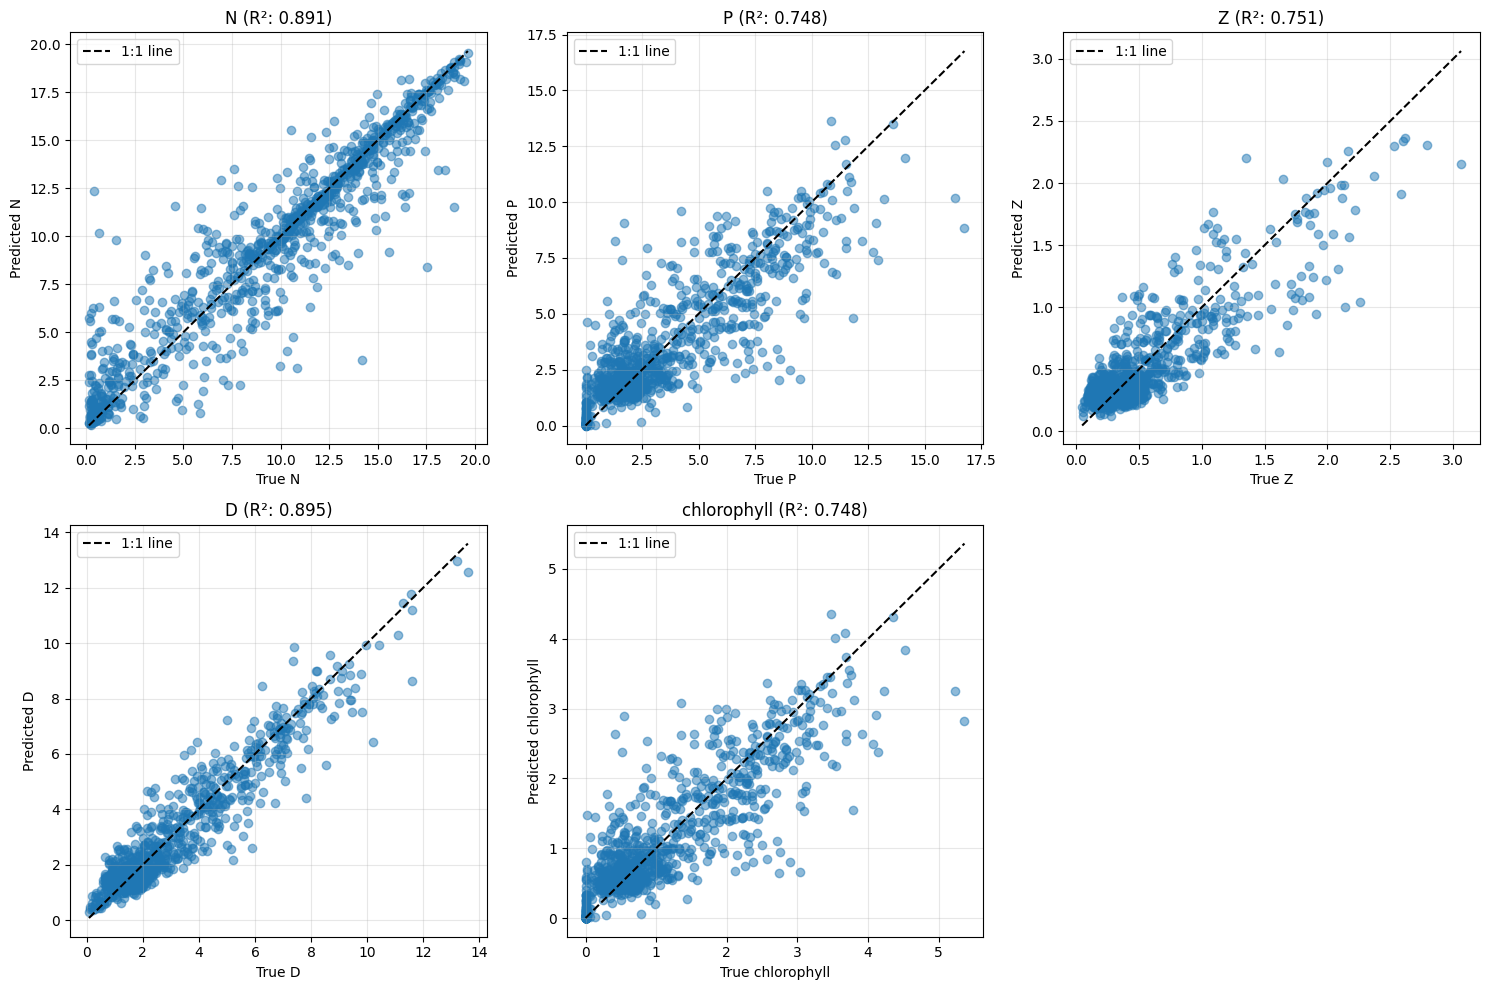

In [10]:
# Scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, output in enumerate(outputs):
    ax = axes[i]
    ax.scatter(predictions[f'{output}_true'], predictions[f'{output}_pred'], alpha=0.5)
    min_val = min(predictions[f'{output}_true'].min(), predictions[f'{output}_pred'].min())
    max_val = max(predictions[f'{output}_true'].max(), predictions[f'{output}_pred'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')
    ax.set_xlabel(f'True {output}')
    ax.set_ylabel(f'Predicted {output}')
    ax.set_title(f'{output} (R²: {metrics[output]["R²"]:.3f})')
    ax.grid(True, alpha=0.3)
    ax.legend()

axes[-1].axis('off')
plt.tight_layout()
plt.savefig('figures/prediction_scatter_plots.png', dpi=150)
plt.show()